## Bootstrap

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

### Hipóteses

Nossa hipótese pretende reconhecer se um astro na NBA tem uma relação de vir de uma determinada universidade. Com isso, faremos um boostrap para essas dados, a fim de observar se há um comportamento aleatório entre uma universidade e allstar


**HO**: ser um grande astro no NBA é um processo aleatório e não depende de uma determinada universidade

**H1**: Ser um astro no NBA depende de uma determinada universidade

Para ver o comportamento disso, a gente faz uma bootstrap média no dataset para os jogos de astros nos anos 2000- até 2016



Primeiramente, pegamos nossos dados dos draft dos anos de 1980 ate 2017

In [3]:
df = pd.read_csv("nba_draft.tsv",sep='\t')
df

,year,round,pick,player,position,school,allstar_appearance,allstar_by_school,draft_picks
0,1980,1,1.0,"Carroll, Joe Barry",F/C,Purdue,1,1,1
1,1980,1,2.0,"Griffith, Darrell",G,Louisville,0,0,1
2,1980,1,3.0,"McHale, Kevin",F/C,Minnesota,7,1,1
3,1980,1,4.0,"Ransey, Kelvin",G,Ohio State,0,0,1
4,1980,1,5.0,"Ray, James",F,Jacksonville,0,0,1
...,...,...,...,...,...,...,...,...,...
2162,2018,2,56.0,Jacob Evans,SF,Cincinnati,0,0,1
2163,2018,2,57.0,Jevon Carter,PG,West Virginia,0,0,1
2164,2018,2,58.0,Borisa Simanic,SF/PF,Serbia,0,0,1
2165,2018,2,59.0,Bonzie Colson,SF/PF,Notre Dame,0,0,1


Como nossa base principal tem dados de 2000 até 2016, faremos alguns drop de alguns anos nessa base

In [4]:
df.drop(df.loc[df['year']<2000].index, inplace=True)
df.drop(df.loc[df['year']>2016].index, inplace=True)
df

,year,round,pick,player,position,school,allstar_appearance,allstar_by_school,draft_picks
1035,2000,1,1.0,"Martin, Kenyon",PF,Cincinnato (Sr.),1,1,1
1036,2000,1,2.0,"Swift, Stromile",PF/C,LSU,0,0,1
1037,2000,1,3.0,"Miles, Darius",SF/PF,East St. Louis HS (Illinois),0,0,1
1038,2000,1,4.0,"Fizer, Marcus",PF/SF,Iowa State,0,0,1
1039,2000,1,5.0,"Miller, Mike",SF/SG,Florida,0,0,1
...,...,...,...,...,...,...,...,...,...
2042,2016,2,56.0,"Hamilton, Daniel",SG/SF,Connecticut,0,0,1
2043,2016,2,57.0,"Wang Zhelin,",C,Fujian Sturgeons,0,0,1
2044,2016,2,58.0,"Nader, Abdel",SF,Iowa State,0,0,1
2045,2016,2,59.0,"Cousins, Isaiah",PG/SG,Oklahoma,0,0,1


Como o draft acontece em todo ano, diferente times draftam jogadores diferente, ai fazemos uma groupby de soma na coluna school para ver a quantidade total de jogadores que foram draftados pela aquela faculdade e tambem os astros da faculdade também.

In [5]:
df = df.groupby(['school']).sum()
df

,year,round,pick,allstar_appearance,allstar_by_school,draft_picks
school,,,,,,
AEK,4003,3,83.0,0,0,2
ASA BH Telecom,2006,2,56.0,0,0,1
ASC Denain-Voltaire,2016,2,44.0,0,0,1
ASVEL Basket,2013,1,28.0,0,0,1
Adecco Estudiantes,2006,1,27.0,0,0,1
...,...,...,...,...,...,...
Yonsei University,2004,2,46.0,0,0,1
Élan Chalon,2014,1,25.0,0,0,1
Ülkerspor,4008,4,78.0,0,0,2


Faremos uma comparacão entre a quantidade de jogadores que foram draftado por cada universidade e tambem a quantidade de astros que vieram dessa universidade.

Como essa  base  é secundaria, queremos ver se a quantidade de jogadores que foram draftados pela uma universidade pela uma universidade tem impacta a quantidade de ser um  allstar aumentar, como se uma determinada universiadade draftou uma quantidade maior de jogadores, isso impacta para a quantidade de astros aumentar.   

In [7]:
def ic(df, pick):
    data = df[pick]
    mean = data.mean()
    std = data.std(ddof=1)
    se = std / np.sqrt(len(data))
    
    return (mean - 1.96 * se, mean + 1.96 * se)

In [8]:
ic(df,'allstar_by_school')

(0.16457249756095732, 0.300944743818353)


Faremos um bootstrap para a coluna allstars e as faculdades

In [9]:
def bootstrap_mean(df,column, n):
    values = np.zeros(n)
    for i in range(n):
        sample = df[column].sample(len(df), replace=True)
        values[i] = sample.mean()
    return values

In [10]:
bootstrap_mean(df,'allstar_by_school', 10000)

array([0.23850575, 0.24137931, 0.23563218, ..., 0.22126437, 0.28735632,
       0.18965517])

In [11]:
mean = df['allstar_by_school'].mean()

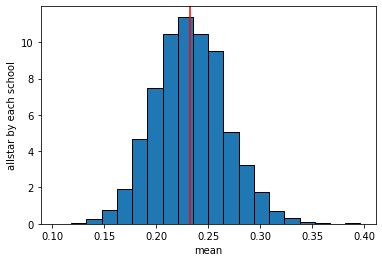

In [12]:
values = bootstrap_mean(df,'allstar_by_school', 10000)
plt.hist(values, bins=20, density=True, edgecolor='k')
plt.axvline(mean, color='red')
plt.ylabel('allstar by each school')
plt.xlabel('mean')
plt.show()

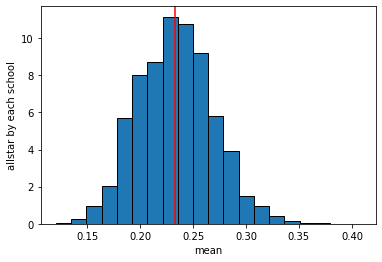

In [13]:
values = bootstrap_mean(df,'allstar_by_school', 5000)
plt.hist(values, bins=20, density=True, edgecolor='k')
plt.axvline(mean, color='red')
plt.ylabel('allstar by each school')
plt.xlabel('mean')
plt.show()

Pelo gráfico  em cima, podemos ver que o comportamento entre ser um astro e vir de determinada universidade é aleatório. 